In [1]:
import numpy as np

In [2]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [3]:
%cd ./deep-learning-from-scratch-master/

/Users/macowner/Documents/Programming/0tsuku/deep-learning-from-scratch-master


In [5]:
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet

In [6]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01) # 学習係数0.01のSGDでパラメータ更新

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

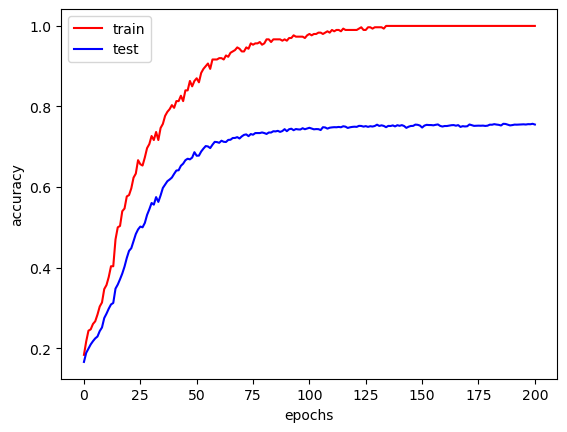

In [18]:
plt.plot(train_acc_list, label='train', color='red')
plt.plot(test_acc_list, label='test', color='blue')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [19]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask